# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib

# Import API key
from api_keys import api_key
import api_keys
# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + api_key
# print(url)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
 # Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
# Try statement to append calls where value is found 
# Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
# Increase counter by one 
        record= record + 1
        
# Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=beringovskiy
Processing Record 2 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=puerto ayora
Processing Record 3 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sitka
Processing Record 4 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hambantota
Processing Record 5 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bambous virieux
Processing Record 6 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=alofi
Processing Record 7 | Lodja
http://api.openweathermap.org/data/

Processing Record 56 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=jamestown
City not found. Skipping...
Processing Record 57 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=busselton
Processing Record 58 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kaitangata
Processing Record 59 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bandarbeyla
Processing Record 60 | Kapiri Mposhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kapiri mposhi
Processing Record 61 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=upernavik
Processing Record 62 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weath

Processing Record 111 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=nanortalik
Processing Record 112 | Kinango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kinango
Processing Record 113 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bethel
Processing Record 114 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=lompoc
City not found. Skipping...
City not found. Skipping...
Processing Record 115 | Ha Noi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ha noi
Processing Record 116 | Taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=taltal
Processing Record 117 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 166 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=karratha
Processing Record 167 | Sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sabha
Processing Record 168 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=katsuura
Processing Record 169 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=saint george
Processing Record 170 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=talnakh
Processing Record 171 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sao filipe
City not found. Skipping...
Processing Record 172 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 222 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=yeppoon
Processing Record 223 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=chapais
City not found. Skipping...
Processing Record 224 | Sokoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sokoni
Processing Record 225 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=mahebourg
Processing Record 226 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=los llanos de aridane
Processing Record 227 | Chishtian Mandi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=chishtian mandi
Processing Record 228 | Jumla
http://api.openweathermap.org/data/2.5

Processing Record 277 | Great Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=great falls
City not found. Skipping...
Processing Record 278 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hasaki
Processing Record 279 | Tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tabou
Processing Record 280 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=hilo
Processing Record 281 | Pokhara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=pokhara
Processing Record 282 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tessalit
Processing Record 283 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c

Processing Record 332 | Harlingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=harlingen
Processing Record 333 | Plymouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=plymouth
Processing Record 334 | Blagoyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=blagoyevo
Processing Record 335 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ketchikan
Processing Record 336 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=lata
Processing Record 337 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=pringsewu
Processing Record 338 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec69

Processing Record 388 | Bichena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bichena
Processing Record 389 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=adrar
Processing Record 390 | Todos Santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=todos santos
Processing Record 391 | Bucarasica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=bucarasica
Processing Record 392 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kieta
Processing Record 393 | Mbanza-Ngungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=mbanza-ngungu
Processing Record 394 | Lianzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39

Processing Record 444 | Izumo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=izumo
Processing Record 445 | Gazli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=gazli
Processing Record 446 | Dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=dwarka
Processing Record 447 | Altamont
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=altamont
Processing Record 448 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=sola
Processing Record 449 | Jiaozuo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=jiaozuo
Processing Record 450 | Mujiayingzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=mujiayingzi
Proce

Processing Record 501 | Boa Vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=boa vista
Processing Record 502 | Nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=nalut
Processing Record 503 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=brae
Processing Record 504 | Paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=paita
Processing Record 505 | Tongliao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=tongliao
Processing Record 506 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=te anau
Processing Record 507 | Wellington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=wellington
P

Processing Record 557 | Amudat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=amudat
Processing Record 558 | Blagoveshchensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=blagoveshchensk
City not found. Skipping...
Processing Record 559 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=kudahuvadhoo
Processing Record 560 | Gladstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=gladstone
Processing Record 561 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e&q=ayan


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [23]:
weather_data_dict = {
    "City Name": city_name, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
                   
# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_data_dict)

# Display count of weather data values 
weather_data.count()

City Name     561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [24]:
#Save weather data to csv
weather_data.to_csv('../PythonAPI/weather_data.csv')

weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Beringovskiy,0,RU,1562948710,81,63.05,179.32,53.12,5.19
1,Puerto Ayora,75,EC,1562948711,69,-0.74,-90.35,77.00,16.11
2,Sitka,0,US,1562948712,57,37.17,-99.65,82.99,8.01
3,Hambantota,40,LK,1562948713,94,6.12,81.12,82.40,6.93
4,Bambous Virieux,40,MU,1562948715,64,-20.34,57.76,71.60,11.41


#### Latitude vs. Temperature Plot

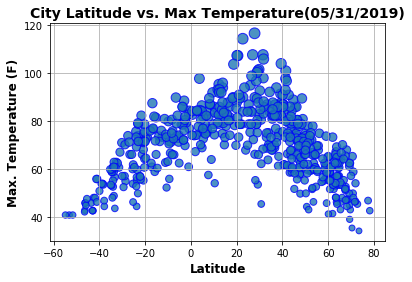

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s = max_temp*10, edgecolor="blue", alpha=0.8, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Max. Temperature (F)", weight='semibold',fontsize=12)
plt.grid(True)

plt.savefig('../PythonAPI/Max_Temp vs. Latitude.png', dpi=150)


plt.show()



#### Latitude vs. Humidity Plot

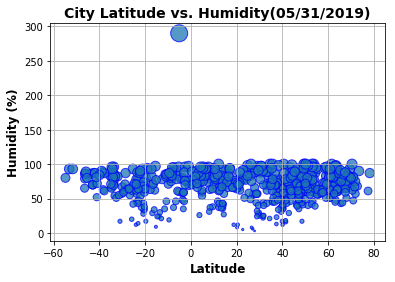

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s= humidity*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Humidity (%)", weight='semibold',fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Humidity.png', dpi=150)

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

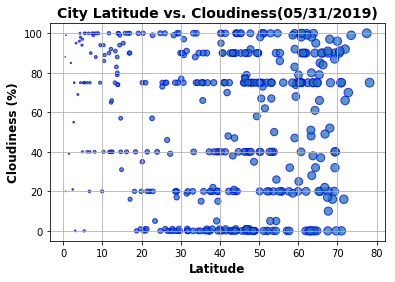

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s= lat*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold', fontsize=12)
plt.ylabel("Cloudiness (%)", weight='semibold', fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Cloudiness.png', dpi=150)

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

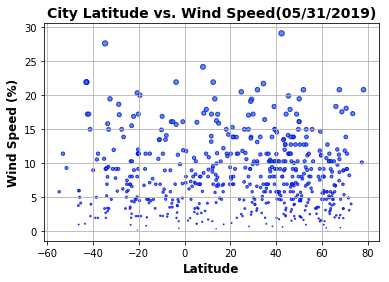

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s= wind_speed*10, edgecolor="blue", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(05/31/2019)", weight='semibold', fontsize=14)
plt.xlabel("Latitude",weight='semibold', fontsize=12)
plt.ylabel("Wind Speed (%)",weight='semibold', fontsize=12)
plt.grid()

# Save the figure
plt.savefig('../PythonAPI/City Latitude vs. Wind Speed.png', dpi=150)

#Show plot
plt.show()

In [49]:
weather_data_dict = {
    "City Name": city_name, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
}
                   
# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_data_dict)
print(weather_data)

# Display count of weather data values 
# weather_data.count()

                   City Name  Cloudiness Country        Date  Humidity  \
0               Beringovskiy           0      RU  1562948710        81   
1               Puerto Ayora          75      EC  1562948711        69   
2                      Sitka           0      US  1562948712        57   
3                 Hambantota          40      LK  1562948713        94   
4            Bambous Virieux          40      MU  1562948715        64   
5                      Alofi          75      NU  1562948716        94   
6                      Lodja          97      CD  1562948717        48   
7                    Kahului           1      US  1562948125        78   
8                   Bellevue          75      DE  1562948507        60   
9             Port Elizabeth          40      US  1562948721        74   
10                    Albany          90      US  1562948427        69   
11                      Lebu         100      ET  1562948723        78   
12                    Zamora          

In [50]:
import pandas as pd
import requests

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

# tables = pd.read_html(url)
# tables

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f67c78627c62ce245c39367d6ec692e


In [42]:
html_table = weather_data.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City Name</th>\n      <th>Cloudiness</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Lat</th>\n      <th>Lng</th>\n      <th>Max Temp</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Beringovskiy</td>\n      <td>0</td>\n      <td>RU</td>\n      <td>1562948710</td>\n      <td>81</td>\n      <td>63.05</td>\n      <td>179.32</td>\n      <td>53.12</td>\n      <td>5.19</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Puerto Ayora</td>\n      <td>75</td>\n      <td>EC</td>\n      <td>1562948711</td>\n      <td>69</td>\n      <td>-0.74</td>\n      <td>-90.35</td>\n      <td>77.00</td>\n      <td>16.11</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Sitka</td>\n      <td>0</td>\n      <td>US</td>\n      <td>1562948712</td>\n      <td>57</td>\n      <td>37.17</td>\n      <td>-9

In [52]:
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>City Name</th>      <th>Cloudiness</th>      <th>Country</th>      <th>Date</th>      <th>Humidity</th>      <th>Lat</th>      <th>Lng</th>      <th>Max Temp</th>      <th>Wind Speed</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Beringovskiy</td>      <td>0</td>      <td>RU</td>      <td>1562948710</td>      <td>81</td>      <td>63.05</td>      <td>179.32</td>      <td>53.12</td>      <td>5.19</td>    </tr>    <tr>      <th>1</th>      <td>Puerto Ayora</td>      <td>75</td>      <td>EC</td>      <td>1562948711</td>      <td>69</td>      <td>-0.74</td>      <td>-90.35</td>      <td>77.00</td>      <td>16.11</td>    </tr>    <tr>      <th>2</th>      <td>Sitka</td>      <td>0</td>      <td>US</td>      <td>1562948712</td>      <td>57</td>      <td>37.17</td>      <td>-99.65</td>      <td>82.99</td>      <td>8.01</td>    </tr>    <tr>      <th>3</th>      <td>Hamba

In [54]:
weather_data.to_html('datapage.html')
